### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [58]:
data = pd.read_csv('data/coupons.csv')

In [59]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [60]:
#check for non-numbers
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [61]:
#drill down into na containing columns
columns = ['car','Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
problem_df = data[columns]
problem_df.head()

for c in columns:
    print(c + ': ')
    print(problem_df[c].unique())




car: 
[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
Bar: 
['never' 'less1' '1~3' 'gt8' nan '4~8']
CoffeeHouse: 
['never' 'less1' '4~8' '1~3' 'gt8' nan]
CarryAway: 
[nan '4~8' '1~3' 'gt8' 'less1' 'never']
RestaurantLessThan20: 
['4~8' '1~3' 'less1' 'gt8' nan 'never']
Restaurant20To50: 
['1~3' 'less1' 'never' 'gt8' '4~8' nan]


3. Decide what to do about your missing data -- drop, replace, other...

In [62]:
#replace nan's with 'N/A'
dropna_df=data.fillna('N/A')

#check the values now
for c in columns:
    print(c + ': ')
    print(dropna_df[c].unique())

#check for non-numbers
assert(dropna_df.isna().sum().sum() == 0)

car: 
['N/A' 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
Bar: 
['never' 'less1' '1~3' 'gt8' 'N/A' '4~8']
CoffeeHouse: 
['never' 'less1' '4~8' '1~3' 'gt8' 'N/A']
CarryAway: 
['N/A' '4~8' '1~3' 'gt8' 'less1' 'never']
RestaurantLessThan20: 
['4~8' '1~3' 'less1' 'gt8' 'N/A' 'never']
Restaurant20To50: 
['1~3' 'less1' 'never' 'gt8' '4~8' 'N/A']


In [63]:
#rename the misspelled passanger column
dropna_df.rename(columns={'passanger':'passenger'}, inplace=True)

In [64]:
#check whether the direction colums are redundant
print(dropna_df['direction_opp'].value_counts())
print(dropna_df['direction_same'].value_counts())

#These are identical, so we can drop one of them. I will drop the 'direction_opp' column.
dropna_df.drop(columns=['direction_opp'], inplace=True)


direction_opp
1    9960
0    2724
Name: count, dtype: int64
direction_same
0    9960
1    2724
Name: count, dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



In [65]:
#define a function to print and retun the acceptance ratio
#this is hard coded for the Y column and the values of Y
def accept_count(df, title):
    counts = df['Y'].value_counts()
    prop = counts[0] / (counts[0]+counts[1])
    print(title + ': ' + f"{prop:.1%}")

accept_count(dropna_df, 'Total Observations')

#43.2% accepted the coupon

Total Observations: 43.2%


5. Use a bar plot to visualize the `coupon` column.

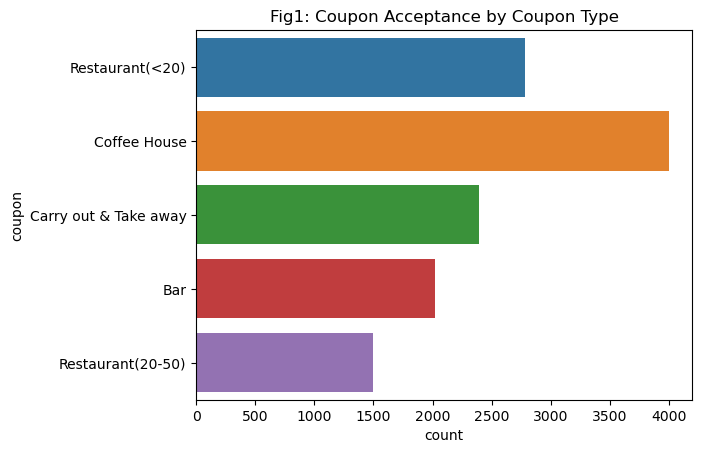

In [66]:
#barplot wants numeric only.  Use countplot instead
sns.countplot(data=dropna_df, y='coupon')
plt.title('Fig1: Coupon Acceptance by Coupon Type')
plt.savefig('images/fig1.png')

6. Use a histogram to visualize the temperature column.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


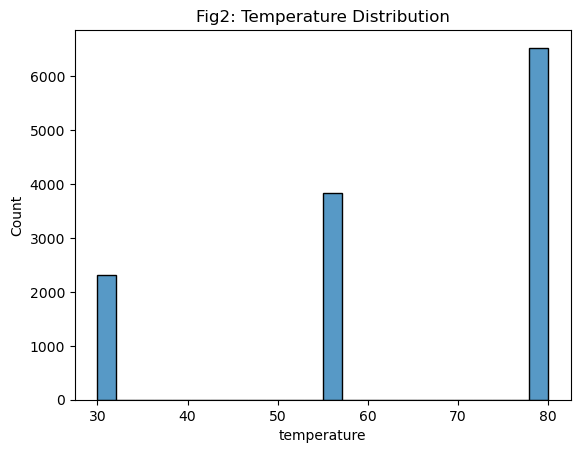

In [67]:
sns.histplot(data=dropna_df, x='temperature')
plt.title('Fig2: Temperature Distribution')
plt.savefig('images/fig2.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [68]:
bar_df = dropna_df.loc[dropna_df['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [69]:
accept_count(bar_df, 'Bar Coupons')

#59% of Bar Coupons were accepted

Bar Coupons: 59.0%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


3 or fewer visits to a bar per month: 62.9%
More than 3 visits to a bar per month: 22.0%


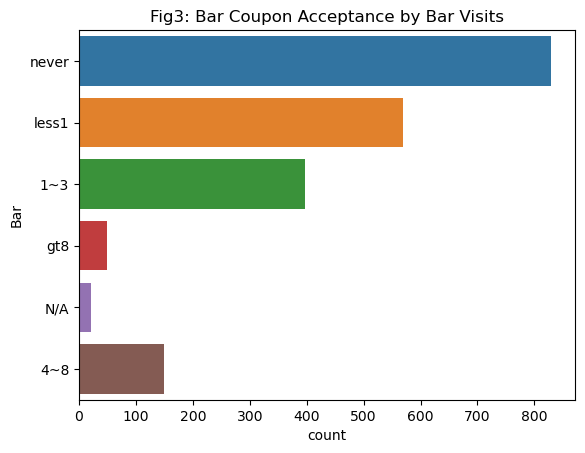

In [70]:
#look at the value counts for 'Bar'
sns.countplot(data=bar_df, y='Bar')
plt.title('Fig3: Bar Coupon Acceptance by Bar Visits')
plt.savefig('images/fig3.png')

#use explicit values to omit the N/A entries
fewer = ['never', 'less1', '1~3']
more = ['4~8']

df = bar_df

fewer_df=df.loc[df['Bar'].isin(fewer)]
more_df=df.loc[df['Bar'].isin(more)]

accept_few = accept_count(fewer_df, "3 or fewer visits to a bar per month")
accept_more = accept_count(more_df, 'More than 3 visits to a bar per month')


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Visit a bar more than once per month and are over 25: 33.0%
All Others: 61.5%


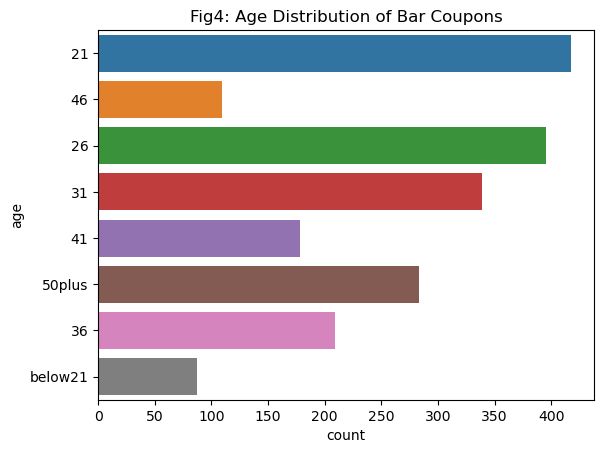

In [71]:
#look at the value counts for 'age''
sns.countplot(data=bar_df, y='age')
plt.title('Fig4: Age Distribution of Bar Coupons')
plt.savefig('images/fig4.png')

under25 = ['21', 'below21']
morethanonce = ['1~3','4~8','gt8']

df = bar_df

select_df = df.loc[dropna_df['age'].isin(under25) & df['Bar'].isin(morethanonce)]
ns_df = df.loc[~(dropna_df['age'].isin(under25) & df['Bar'].isin(morethanonce))]

accept_few = accept_count(select_df, "Visit a bar more than once per month and are over 25")
accept_more = accept_count(ns_df, 'All Others')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


passenger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

Visit a bar more than once per month, had non-kid passengers, and not in farming, fishing, or forestry: 32.7%
All Others: 65.5%


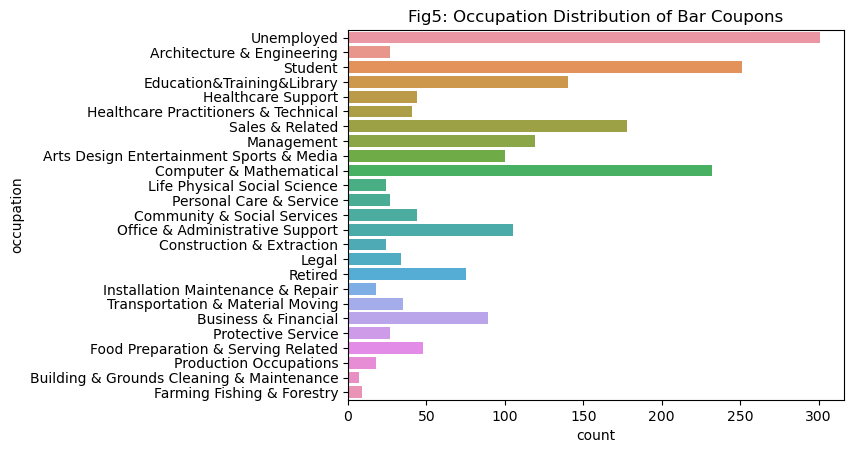

In [86]:
#look at the value counts for 'occupation''
sns.countplot(data=bar_df, y='occupation')
plt.title('Fig5: Occupation Distribution of Bar Coupons')
plt.savefig('images/fig5.png')

#look at the value counts for 'occupation''
print(dropna_df['passenger'].value_counts())
print()

morethanonce = ['1~3','4~8','gt8']
notakid = ['Friend(s)', 'Partner']
fff = 'Farming Fishing & Forestry'

df = bar_df

select_df = df.loc[df['Bar'].isin(morethanonce) & (~df['passenger'].isin(notakid)) & (df['occupation'] != fff)]
ns_df = df.loc[~(df['Bar'].isin(morethanonce) & (~df['passenger'].isin(notakid)) & (df['occupation'] != fff))]

accept_count(select_df, "Visit a bar more than once per month, had non-kid passengers, and not in farming, fishing, or forestry")
accept_count(ns_df, 'All Others')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [88]:
# look at the value counts for 'maritalStatus', 'RestaurantLessThan20' and 'income'
print(bar_df['maritalStatus'].value_counts())
print()
print(bar_df['RestaurantLessThan20'].value_counts())
print()
print(bar_df['income'].value_counts())
print()

maritalStatus
Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: count, dtype: int64

RestaurantLessThan20
1~3      878
4~8      568
less1    325
gt8      186
never     37
N/A       23
Name: count, dtype: int64

income
$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: count, dtype: int64



In [99]:
# build the complex expression
df = bar_df
morethanonce = ['1~3','4~8','gt8']
notakid = ['Friend(s)', 'Partner']
under30 = ['21', 'below21','26']
morethan4times = ['4~8','gt8']
lessthan50k = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

mask = ((((df['Bar'].isin(morethanonce)) & (df['passenger'].isin(notakid)) & (df['maritalStatus'] != 'Widowed')) |
         ((df['Bar'].isin(morethanonce)) & (df['age'].isin(under30))) |
         ((df['RestaurantLessThan20'].isin(morethan4times)) & (df['income'].isin(lessthan50k)))))


select_df = df.loc[mask]
ns_df = df.loc[~mask]

accept_count(select_df, "(Bar > 1x/month, non-kid passengers, not widowed) OR (Bar > 1x/month, under 30) OR (Cheap restaurant > 4x/month, income < $50k)")
accept_count(ns_df, 'All Others')


(Bar > 1x/month, non-kid passengers, not widowed) OR (Bar > 1x/month, under 30) OR (Cheap restaurant > 4x/month, income < $50k): 43.1%
All Others: 66.8%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Analysis of Bar Coupons ##
1.  Drivers who visit bars more than 3 times per month are much less likely to accept a bar coupon

* 3 or fewer visits to a bar per month: 62.9%
* More than 3 visits to a bar per month: 22.0%

2. Widening the selection to include those who visit once or more per month and constraining it to those over 25 reduced this difference

* Visit a bar more than once per month and are over 25: 33.0%
* All Others: 61.5%

3. More constrained selections did not increase the difference, implying that the number of visits is highly determinant of coupon acceptance.

* Visit a bar more than once per month, had non-kid passengers, and not in farming, fishing, or forestry: 32.7%
* All Others: 65.5%

* (Bar > 1x/month, non-kid passengers, not widowed) OR (Bar > 1x/month, under 30) OR (Cheap restaurant > 4x/month, income < $50k): 43.1%
* All Others: 66.8%


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  